In [1]:
import matplotlib.pyplot as plt
from hmm import *
from pyhmmer.plan7 import *
from phmm2hmm import toHMM
from collections import defaultdict
from seq_split import seq_split_by_hmm_cycles
from distanceMatrix import build_distance_matrix, matrix_closure, connected_components, distance_values

In [2]:
with HMMFile("data/DF0000014.hmm") as hmm_file:
#with HMMFile("data/sample.hmm") as hmm_file:
    phmm = hmm_file.read()

In [3]:
input_hmm = toHMM(phmm)

In [4]:
fasta_file = open("./data/chr11_HSA_simple.fasta")
seqStr = fasta_file.read()
fasta_file.close()

In [5]:
code_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
code_seq = np.array([code_map[b] for b in seqStr])
train_seq = code_seq.reshape(1, -1)

In [6]:
(start_dna_seq, dna_seqs, _), (start_state_seq, state_seqs, _) = seq_split_by_hmm_cycles(code_seq, input_hmm)

In [7]:
dna_seq_dists = build_distance_matrix(dna_seqs)

In [33]:
dna_seq_dists.max()

61

(array([ 14.,  11.,  14.,  23.,  11.,  17.,   9.,  24.,  20.,  20.,  26.,
          6.,  24.,  15.,  16.,  21.,  34.,  41.,  29.,  24.,  30.,  23.,
         12.,   7.,  12.,  19.,  24.,  29.,  40.,  26.,  41.,  27.,  35.,
         40.,  48.,  38.,  70.,  85.,  85., 123., 121., 165., 227., 249.,
        270., 278., 271., 276., 253., 198., 217., 160., 112.,  85.,  47.,
         65.,  33.,  13.,  14.,  11.]),
 array([ 0.        ,  1.01666667,  2.03333333,  3.05      ,  4.06666667,
         5.08333333,  6.1       ,  7.11666667,  8.13333333,  9.15      ,
        10.16666667, 11.18333333, 12.2       , 13.21666667, 14.23333333,
        15.25      , 16.26666667, 17.28333333, 18.3       , 19.31666667,
        20.33333333, 21.35      , 22.36666667, 23.38333333, 24.4       ,
        25.41666667, 26.43333333, 27.45      , 28.46666667, 29.48333333,
        30.5       , 31.51666667, 32.53333333, 33.55      , 34.56666667,
        35.58333333, 36.6       , 37.61666667, 38.63333333, 39.65      ,
      

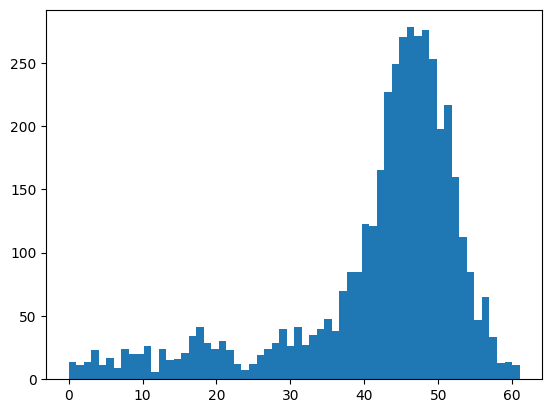

In [10]:
plt.hist(distance_values(dna_seq_dists), bins=60)

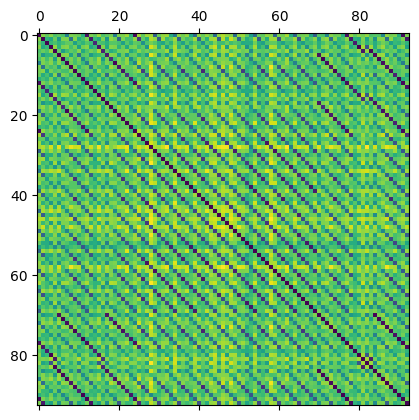

In [11]:
plt.matshow(dna_seq_dists)

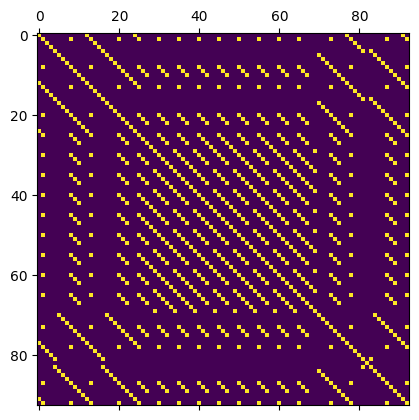

In [30]:
plt.matshow(matrix_closure(dna_seq_dists<=15))

In [27]:
dna_seq_clusters = connected_components(dna_seq_dists<=20, min_size=1)

In [31]:
connected_components(dna_seq_dists<=15, min_size=1)

[[0, 12, 24, 77, 91],
 [1, 8, 13, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 73, 78, 87, 92],
 [2, 14, 79],
 [3, 15, 80],
 [4, 16, 81, 83],
 [5, 17, 70, 84],
 [6, 18, 71, 85],
 [7, 19, 72, 86],
 [9, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 74, 88],
 [10, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 75, 89],
 [11, 23, 76, 90],
 [28, 43, 48, 58],
 [29, 34, 39, 44, 49, 54, 59, 64, 69],
 [33, 38, 53, 63, 68],
 [82]]

In [17]:
seq_to_cluster = {seq_index:cluster_index for cluster_index, cluster in enumerate(dna_seq_clusters) for seq_index in cluster}

In [18]:
[seq_pos for seq_pos in range(len(dna_seqs)) if seq_pos not in seq_to_cluster]

[]

In [19]:
"".join([chr(65 + seq_to_cluster[seq_pos]) if seq_pos in seq_to_cluster else '-' for seq_pos in range(len(dna_seqs))])

'ABCDEFGABHFIABCDEFGABHFIABHFIABHFIABHFIABHFIABHFIABHFIABHFIABHFIABHFIAFGABHFIABCDEDEFGABHFIAB'

In [20]:
len(dna_seq_clusters)

9

(array([4., 0., 0., 0., 0., 0., 2., 0., 0., 3.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <BarContainer object of 10 artists>)

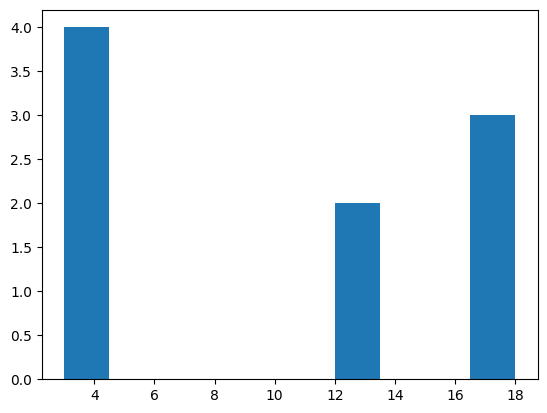

In [21]:
plt.hist([len(cluster) for cluster in dna_seq_clusters])

In [ ]:
log_prob / np.log(2)

-21443.11549625917

In [ ]:
- train_seq.size * 2

-32070